In [31]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random

In [32]:
x = load_boston().data[:, 5]
y = load_boston().target

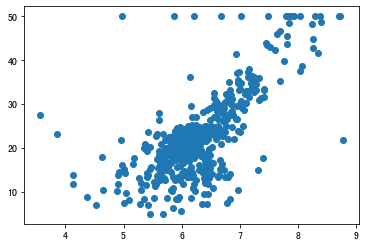

In [33]:
plt.Figure()
plt.scatter(x, y)

In [92]:
def prediction_price(k, b, x):
    return k * x + b

In [46]:
def loss(y, y_hat):
    loss_value = 0
    for i in range(len(y)):
        loss_value += (y[i] - y_hat[i])**2
    return loss_value / len(y)

In [117]:
def loss_to_k_guidance(x, y, y_hat):
    k_guidance = 0
    n = len(x)
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        k_guidance += (y_i - y_hat_i) * x_i
    return  -2 / n * k_guidance


In [123]:
def loss_to_b_guidance(y, y_hat):
    g_guidance = 0
    n = len(y)
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        g_guidance += (y_i - y_hat_i)
    return -2 / n * g_guidance


In [120]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [128]:
def gradient_descent(x, y, n=1000):
    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100 
    learn_rate = 0.001
    smaller_loss = float('inf')
    for i in range(n):
        y_hat = [prediction_price(current_k, current_b, x_i) for x_i in x]
        loss_value = loss(y, y_hat)
        if loss_value < smaller_loss: # performance became better
            smaller_loss = loss_value
            if i % 100 == 0:
                print('运行次数：{}, current_k: {}, current_b: {}, loss_vaule: {}'.format(i, current_k, current_b, smaller_loss))
        k_change = loss_to_k_guidance(x, y, y_hat)
        b_change = loss_to_b_guidance(y, y_hat)
        current_k = current_k + (-1 * k_change) * learn_rate
        current_b = current_b + (-1 * b_change) * learn_rate   
    

In [129]:
gradient_descent(x, y, 10000)

运行次数：0, current_k: 59.644056305153356, current_b: -26.828262481659706, loss_vaule: 107239.4271961681
运行次数：100, current_k: 9.127657565435554, current_b: -34.76944885294249, loss_vaule: 43.60468463208757
运行次数：200, current_k: 9.117850720337467, current_b: -34.77074352050249, loss_vaule: 43.600675282277415
运行次数：300, current_k: 9.117811026245798, current_b: -34.77050333571167, loss_vaule: 43.600674689527374
运行次数：400, current_k: 9.117773311728905, current_b: -34.77026343160037, loss_vaule: 43.60067409977047
运行次数：500, current_k: 9.11773568816148, current_b: -34.770024103648474, loss_vaule: 43.60067351284323
运行次数：600, current_k: 9.117698154960747, current_b: -34.76978535052935, loss_vaule: 43.60067292873207
运行次数：700, current_k: 9.11766071190961, current_b: -34.769547170862396, loss_vaule: 43.60067234742346
运行次数：800, current_k: 9.117623358791521, current_b: -34.76930956327021, loss_vaule: 43.60067176890386
运行次数：900, current_k: 9.117586095390491, current_b: -34.76907252637883, loss_vaule: 43.600

运行次数：8400, current_k: 9.115031947509433, current_b: -34.75282529029323, loss_vaule: 43.600635029702914
运行次数：8500, current_k: 9.115000908321855, current_b: -34.75262784635813, loss_vaule: 43.60063463023214
运行次数：8600, current_k: 9.114969943686132, current_b: -34.75243087665616, loss_vaule: 43.60063423267803
运行次数：8700, current_k: 9.114939053423203, current_b: -34.75223438004834, loss_vaule: 43.60063383703129
运行次数：8800, current_k: 9.114908237354447, current_b: -34.75203835539839, loss_vaule: 43.60063344328291
运行次数：8900, current_k: 9.114877495301647, current_b: -34.75184280157265, loss_vaule: 43.60063305142373
运行次数：9000, current_k: 9.114846827087032, current_b: -34.75164771744033, loss_vaule: 43.60063266144465
运行次数：9100, current_k: 9.114816232533245, current_b: -34.75145310187324, loss_vaule: 43.600632273336636
运行次数：9200, current_k: 9.114785711463364, current_b: -34.75125895374597, loss_vaule: 43.60063188709081
运行次数：9300, current_k: 9.114755263700896, current_b: -34.75106527193576, loss_vau

In [130]:
y_hat = prediction_price(9.127657565435554, -34.76944885294249, x)

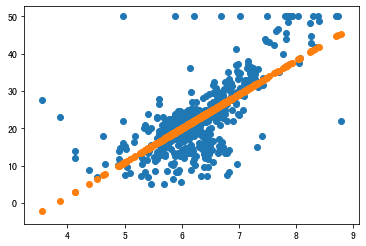

In [131]:
plt.Figure()
plt.scatter(x, y)
plt.scatter(x, y_hat)

In [88]:
min_loss = float('inf')

In [89]:
min_loss

inf